<a href="https://colab.research.google.com/github/jeongwoo22/ESAA_assignments/blob/main/0125_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. EDA

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# 정우
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Esaa/Project/2023 겨울/goodreads_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Esaa/Project/2023 겨울/goodreads_test.csv')

In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA-2/DATA/Kaggle_Books Reviews/goodreads_sample_submission.csv')

In [ ]:
train.head(3)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0


In [ ]:
test.head(3)

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,b9450d1c1f97f891c392b1105959b56e,7092507,5c4df7e70e9b438c761f07a4620ccb7c,** spoiler alert ** \n This is definitely one ...,Sat Nov 10 06:06:13 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sat Nov 10 00:00:00 -0800 2012,1,0
1,b9450d1c1f97f891c392b1105959b56e,5576654,8eaeaf13213eeb16ad879a2a2591bbe5,"** spoiler alert ** \n ""You are what you drink...",Fri Nov 09 21:55:16 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,1,0
2,b9450d1c1f97f891c392b1105959b56e,15754052,dce649b733c153ba5363a0413cac988f,Roar is one of my favorite characters in Under...,Fri Nov 09 00:25:50 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,0,0


In [ ]:
missing_values = train.isnull().sum()
print(missing_values)

user_id              0
book_id              0
review_id            0
rating               0
review_text          0
date_added           0
date_updated         0
read_at          91766
started_at      274297
n_votes              0
n_comments           0
dtype: int64


- user 종류

In [ ]:
train["user_id"].nunique(),test["user_id"].nunique()

(12188, 6705)

In [ ]:
np.intersect1d(train["user_id"].unique(), test["user_id"].unique())

array(['b9450d1c1f97f891c392b1105959b56e'], dtype=object)

- 책 종류

In [ ]:
train["book_id"].nunique(), test["book_id"].nunique()

(25474, 25399)

- rating 종류

In [ ]:
train['rating'].value_counts()

4    313688
5    265007
3    188972
2     72627
0     30988
1     28718
Name: rating, dtype: int64

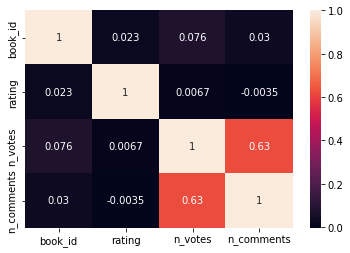

In [ ]:
import seaborn as sns  
corr = train.corr()
sns.heatmap(corr, annot=True)

-> n_votes와 n_comments의 상관관계가 제일 높음

# 2. 텍스트 데이터 전처리 

## 1) 서준

In [ ]:
data = train[:3000]  # 3000개 샘플링

In [ ]:
text=data['review_text'].copy()
text.head(10)

0    This is a special book. It started slow for ab...
1    Recommended by Don Katz. Avail for free in Dec...
2    A fun, fast paced science fiction thriller. I ...
3    Recommended reading to understand what is goin...
4    I really enjoyed this book, and there is a lot...
5    A beautiful story. It is rare to encounter a b...
6    5 stars for giving me a better framework for h...
7    Numerous people in publishing have told me thi...
8    Another hard to put down nonfiction book from ...
9    I love Stephenson - and this was another hit -...
Name: review_text, dtype: object

* 문자열이 아닌 문자는 모두 공백으로 변환

In [ ]:
import re
text=text.apply(lambda x : re.sub("[^a-zA-Z]"," ",x))

In [ ]:
text

0       This is a special book  It started slow for ab...
1       Recommended by Don Katz  Avail for free in Dec...
2       A fun  fast paced science fiction thriller  I ...
3       Recommended reading to understand what is goin...
4       I really enjoyed this book  and there is a lot...
                              ...                        
2995    The United States has been infected with a dis...
2996    Connor is going to be unwinded  He has trouble...
2997    Marguerite is trying to save her family  And t...
2998    Even with a truce between the god of evil Set ...
2999    Kate and her sister have recently moved to Par...
Name: review_text, Length: 3000, dtype: object

* 품사 태깅

In [ ]:
from nltk.corpus import wordnet as wn

def penn_to_wn(tag):
  if tag.startswith('J'):
    return wn.ADJ
  elif tag.startswith('N'):
    return wn.NOUN
  elif tag.startswith('R'):
    return wn.ADV
  elif tag.startswith('V'):
    return wn.VERB

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
  # 감성지수 초기화
  sentiment=0.0
  tokens_count=0

  lemmatizer=WordNetLemmatizer()
  raw_sentences=sent_tokenize(text)

  #분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성지수 합산
  for raw_sentence in raw_sentences:
    #NLTK 기반의 품사 태깅 문장 추출
    tagged_sentence = pos_tag(word_tokenize(raw_sentence))
    for word, tag in tagged_sentence:

      #Wordnet 기반 품사 태깅과 어근 추출
      wn_tag=penn_to_wn(tag)
      if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        continue
      lemma=lemmatizer.lemmatize(word,pos=wn_tag)
      if not lemma:
        continue
      # 어근을 추출한 단어와 WordNet기반 품사 태깅을 입력해 Synset 객체를 생성
      synsets=wn.synsets(lemma,pos=wn_tag)
      if not synsets:
        continue
      #sentiwordnet의 감성 단어 분석으로 감성 synset 추출
      #모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산
      synset=synsets[0]
      swn_synset=swn.senti_synset(synset.name())
      sentiment +=(swn_synset.pos_score()-swn_synset.neg_score())
      tokens_count+=1

  if (tokens_count==0):
    return 0
  else :
    return sentiment


In [ ]:
text=pd.DataFrame(text)

In [ ]:
text

,review_text
0,This is a special book It started slow for ab...
1,Recommended by Don Katz Avail for free in Dec...
2,A fun fast paced science fiction thriller I ...
3,Recommended reading to understand what is goin...
4,I really enjoyed this book and there is a lot...
...,...
2995,The United States has been infected with a dis...
2996,Connor is going to be unwinded He has trouble...
2997,Marguerite is trying to save her family And t...
2998,Even with a truce between the god of evil Set ...


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [ ]:
text['sentiment score']=text['review_text'].apply(lambda x : swn_polarity(x))

In [ ]:
text

,review_text,sentiment score
0,This is a special book It started slow for ab...,0.625
1,Recommended by Don Katz Avail for free in Dec...,0.500
2,A fun fast paced science fiction thriller I ...,1.625
3,Recommended reading to understand what is goin...,0.375
4,I really enjoyed this book and there is a lot...,0.875
...,...,...
2995,The United States has been infected with a dis...,2.375
2996,Connor is going to be unwinded He has trouble...,1.375
2997,Marguerite is trying to save her family And t...,-0.125
2998,Even with a truce between the god of evil Set ...,0.763


* VADER

In [ ]:
text2=data['review_text'].copy()
text2.head(10)

0    This is a special book. It started slow for ab...
1    Recommended by Don Katz. Avail for free in Dec...
2    A fun, fast paced science fiction thriller. I ...
3    Recommended reading to understand what is goin...
4    I really enjoyed this book, and there is a lot...
5    A beautiful story. It is rare to encounter a b...
6    5 stars for giving me a better framework for h...
7    Numerous people in publishing have told me thi...
8    Another hard to put down nonfiction book from ...
9    I love Stephenson - and this was another hit -...
Name: review_text, dtype: object

* 문자열이 아닌 문자는 모두 공백으로 변환

In [ ]:
import re
text2=text2.apply(lambda x : re.sub("[^a-zA-Z]"," ",x))

In [ ]:
text2

0       This is a special book  It started slow for ab...
1       Recommended by Don Katz  Avail for free in Dec...
2       A fun  fast paced science fiction thriller  I ...
3       Recommended reading to understand what is goin...
4       I really enjoyed this book  and there is a lot...
                              ...                        
2995    The United States has been infected with a dis...
2996    Connor is going to be unwinded  He has trouble...
2997    Marguerite is trying to save her family  And t...
2998    Even with a truce between the god of evil Set ...
2999    Kate and her sister have recently moved to Par...
Name: review_text, Length: 3000, dtype: object

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
text2=pd.DataFrame(text2)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer=SentimentIntensityAnalyzer()
neg=[]
neu=[]
pos=[]
compound=[]

for i in range(text2.shape[0]):
  sentiment=senti_analyzer.polarity_scores(text2['review_text'][i])
  neg.append(sentiment['neg'])
  neu.append(sentiment['neu'])
  pos.append(sentiment['pos'])
  compound.append(sentiment['compound'])

text2['sent_neg']=neg
text2['sent_pos']=pos
text2['sent_neu']=neu
text2['sent_compound']=compound

In [ ]:
text2

,review_text,sent_neg,sent_pos,sent_neu,sent_compound
0,This is a special book It started slow for ab...,0.093,0.122,0.785,0.7579
1,Recommended by Don Katz Avail for free in Dec...,0.000,0.267,0.733,0.6249
2,A fun fast paced science fiction thriller I ...,0.105,0.111,0.784,-0.6190
3,Recommended reading to understand what is goin...,0.000,0.307,0.693,0.8126
4,I really enjoyed this book and there is a lot...,0.090,0.145,0.766,0.9954
...,...,...,...,...,...
2995,The United States has been infected with a dis...,0.107,0.285,0.608,0.9975
2996,Connor is going to be unwinded He has trouble...,0.106,0.161,0.733,0.9847
2997,Marguerite is trying to save her family And t...,0.068,0.199,0.733,0.9836
2998,Even with a truce between the god of evil Set ...,0.092,0.195,0.712,0.9811


In [ ]:
text2.to_csv("sentiment.csv")

## 2) 정우

In [ ]:
# 전처리 필요한 모듈 불러오기
import re
from functools import partial
from collections import Counter
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# 1. 소문자로 바꾸기 
def to_lower(text):
    return text.lower()

In [ ]:
# 2. sotpword 제거
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop])

In [ ]:
# 3. 사이트 제거 
import re
from urllib.parse import urlparse

def remove_url(text):
    url = re.compile(r'https?://\S+')
    return url.sub(r'',text)

In [ ]:
# 4. 구두점 제거
import string
remove = string.punctuation

period = '.'
remove = remove.replace(period, '')

def remove_punctuation(text):
    pattern = re.compile(r"[{}]".format(re.escape(remove)))
    
    res = []
    for word in text.split():
        
        # remove all punctiations except periods
        new_word = pattern.sub(r' ', word)
        new_word = new_word.strip(period)
        
        try:
            float(new_word)
        except:
            new_word = new_word.replace(period, ' ')
            
        res.append(new_word)
    
    return ' '.join(res)

In [ ]:
# 5. 알파벳 아닌 단어 제거
def remove_non_alphabetic(text):
    alpha = re.compile(r'[^a-zA-Z]') 
    return alpha.sub(r' ', text)

In [ ]:
# 6. 인용구 제거 
def remove_quotes(text):
    alpha = re.compile(r'"([^"\\]|\\.)*"') 
    return alpha.sub(r' ', text)

In [ ]:
# 7. 스포일러 제거 
def remove_spoiler_alert(text):
    spoiler = re.compile(r'(\(view spoiler\).*?\(hide spoiler\))') 
    return spoiler.sub(r' ', text)

In [ ]:
# 8. 작은 단어들 제거 
def remove_small_words(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

In [ ]:
# 전처리 함수 실행
def process_text(text):
    text = to_lower(text)
    text = remove_url(text)
    text = remove_punctuation(text)
    text = remove_spoiler_alert(text)
    text = remove_quotes(text)
    text = remove_non_alphabetic(text)
    text = remove_stopwords(text)
    text = remove_small_words(text)
    return text

### 3. 텍스트 감성 분석

In [ ]:
text_data = train.drop(['user_id', 'book_id', 'review_id', 'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'], axis=1)

In [ ]:
zeros = np.zeros(len(text_data['review_text']))
zeros_df = pd.DataFrame(zeros)

new_text = []
for i in range(len(text_data['review_text'][:1000])):
  empty = []
  pro_text = process_text(text_data['review_text'][i])
  empty.append(pro_text)
  new_text.append(empty)

In [ ]:
new_text = pd.DataFrame(new_text)
new_text.columns = ['text']
new_text

,text
0,special book started slow first third middle t...
1,recommended katz avail free december
2,fun fast paced science fiction thriller read n...
3,recommended reading understand going middle am...
4,really enjoyed book lot recommend drag little ...
...,...
995,easy quick read heard good things thought chec...
996,harper lee feb thank writing one great america...
997,like much percy jackson heroes olympus books s...
998,beautiful book beautiful illustrations really ...


In [ ]:
import nltk
nltk.download('all')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# 감성 분석 함수 
def vader_socre(text, threshold=0.1): # 임계값 0.1 로, 이거 우리가 조정가능
  analyzer = SentimentIntensityAnalyzer()
  scores = analyzer.polarity_scores(text) 
  return scores

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/n

In [ ]:
vader_list = []
for i in range(len(new_text['text'])):
  vader = vader_socre(new_text['text'][i])
  vader_list.append(vader)

In [ ]:
vader_list = pd.DataFrame(vader_list)

In [ ]:
vader_list

,neg,neu,pos,compound
0,0.112,0.669,0.219,0.9761
1,0.000,0.370,0.630,0.6249
2,0.161,0.604,0.236,0.9712
3,0.000,0.630,0.370,0.5719
4,0.091,0.680,0.229,0.9953
...,...,...,...,...
995,0.089,0.503,0.408,0.9712
996,0.000,0.515,0.485,0.7650
997,0.000,0.376,0.624,0.8910
998,0.000,0.269,0.731,0.8977


In [ ]:
final_text_data = pd.concat([new_text, vader_list], axis = 1)

In [ ]:
final_text_data.head(5)

,text,neg,neu,pos,compound
0,special book started slow first third middle t...,0.112,0.669,0.219,0.9761
1,recommended katz avail free december,0.000,0.370,0.630,0.6249
2,fun fast paced science fiction thriller read n...,0.161,0.604,0.236,0.9712
3,recommended reading understand going middle am...,0.000,0.630,0.370,0.5719
4,really enjoyed book lot recommend drag little ...,0.091,0.680,0.229,0.9953


In [ ]:
final_text_data.to_csv("jeongwoo_data.csv")

# 3. 데이터 선택

* 정우 

In [ ]:
text_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Esaa/Project/2023 겨울/jeongwoo_data.csv',index_col = 0)

In [ ]:
# train_1 데이터 1000개
train_1 = pd.concat([train[:1000],text_1],axis = 1)
train_1 = train_1.drop(['review_text'], axis = 1)  

In [ ]:
train_1.head(3)

,user_id,book_id,review_id,rating,date_added,date_updated,read_at,started_at,n_votes,n_comments,text,neg,neu,pos,compound
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,special book started slow first third middle t...,0.112,0.669,0.219,0.9761
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0,recommended katz avail free december,0.000,0.370,0.630,0.6249
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,fun fast paced science fiction thriller read n...,0.161,0.604,0.236,0.9712


* 서준

In [ ]:
text_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA-2/DATA/Kaggle_Books Reviews/sentiment.csv',index_col = 0)

In [ ]:
text_2

,review_text,sent_neg,sent_pos,sent_neu,sent_compound
0,This is a special book It started slow for ab...,0.093,0.122,0.785,0.7579
1,Recommended by Don Katz Avail for free in Dec...,0.000,0.267,0.733,0.6249
2,A fun fast paced science fiction thriller I ...,0.105,0.111,0.784,-0.6190
3,Recommended reading to understand what is goin...,0.000,0.307,0.693,0.8126
4,I really enjoyed this book and there is a lot...,0.090,0.145,0.766,0.9954
...,...,...,...,...,...
899995,stars Jenna is a popular YA author and ...,0.000,0.219,0.781,0.9716
899996,This was a quick read for me I have read a lo...,0.182,0.108,0.710,-0.8155
899997,spoiler alert stars This book i...,0.103,0.210,0.687,0.9927
899998,spoiler alert Another fun read from Ms...,0.037,0.308,0.654,0.9979


In [ ]:
train_slice = train.drop('review_text',axis = 1)
train_2 = pd.concat([train_slice,text_2],axis = 1)

In [ ]:
# train_2 데이터 1000개
train_2 = train_2[:1000]

In [ ]:
train_2.head(3)

## 1) 전체 데이터 



In [ ]:
# train_1 ID 드랍
X_train_1_all=train_1.drop(["book_id", "review_id",'user_id','rating'],axis = 1)
y_train_1_all =train_1[['rating']]

In [ ]:
# train_2 ID 드랍
X_train_2_all =train_2.drop(["book_id", "review_id",'user_id','rating'],axis = 1)
y_train_2_all = train_2[['rating']]

In [ ]:
# test ID 드랍?? 
X_test = test   # test 는 드랍 안해도 되는지? 

## 2) n_votes", "n_comments","review_text" 칼럼 

In [ ]:
# train_1 - ID 랑 date_added, date_updated 랑 read_at, started_at 드랍 
X_train_1_nvo = train_1.drop(["book_id", "review_id", "user_id", "rating", "date_added", "date_updated", "read_at", "started_at"], inplace = True, axis = 1)
y_train_1_nvo =train_1[['rating']]

In [ ]:
# train_2 - ID 랑 date_added, date_updated 랑 read_at, started_at 드랍 
X_train_2_nvo = train_2.drop(["book_id", "review_id", "user_id", "rating", "date_added", "date_updated", "read_at", "started_at"], inplace = True, axis = 1)
y_train_2_nvo = train_2[['rating']]

In [ ]:
# test - ID 랑 date_added, date_updated 랑 read_at, started_at 드랍 
X_test_nvo = test.drop(columns = ["book_id", "review_id",  "user_id", "date_added", "date_updated", "read_at", "started_at"], inplace = True, axis = 1)

## 3) "review_text" 칼럼

In [ ]:
# train_1 - ID 랑 date_added, date_updated 랑 read_at, started_at, n_votes, n_comments 드랍 
X_train_1_review = train_1.drop(["book_id", "review_id", "date_added", "date_updated", "read_at", "started_at", "user_id", "n_votes", "n_comments"], inplace = True, axis = 1)
y_train_1_review =train_1[['rating']]

In [ ]:
# train_2 - ID 랑 date_added, date_updated 랑 read_at, started_at 드랍 
X_train_2_review = train_2.drop(["book_id", "review_id", "date_added", "date_updated", "read_at", "started_at", "user_id", "n_votes", "n_comments"], inplace = True, axis = 1)
y_train_2_review=train_2[['rating']]

In [ ]:
# test - ID 랑 date_added, date_updated 랑 read_at, started_at 드랍 
X_test_review = test.drop(columns = ["book_id", "review_id", "date_added", "date_updated", "read_at", "started_at", "user_id", "n_votes", "n_comments"], inplace = True, axis = 1)

# 4. Modeling

## 1) LogisticRegresion


In [ ]:
#gridsearch

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### (1) 전체 데이터 

* 1번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])

params = { 'lr_clf__penalty' : ['l2'],
          'lr_clf__C': [1,5,10],
          'lr_clf__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
           'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 500]
}
grid_cv_lr = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_lr.fit(X_train_1_all, y_train_1_all)

print('최적 하이퍼 파라미터: ', grid_cv_lr.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_lr.best_score_))

pred_lr_2_all = grid_cv_lr.predict(X_test)

NameError: ignored

* 2번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])

params = { 'lr_clf__penalty' : ['l2'],
          'lr_clf__C': [1,5,10],
          'lr_clf__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
           'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 500]
}

grid_cv_lr = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_lr.fit(X_train_2_all, y_train_2_all)

print('최적 하이퍼 파라미터: ', grid_cv_lr.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_lr.best_score_))

pred_lr_2_all = grid_cv_lr.predict(x_test)

In [ ]:
sub['rating'] = pred_lr_2_all
sub.to_csv("submission_lr_2_all.csv", index=False)

### (2) n_votes", "n_comments","review_text" 칼럼 

### (3) `review_text` 칼럼

* 1번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])

params = { 'lr_clf__penalty' : ['l2'],
          'lr_clf__C': [1,5,10],
          'lr_clf__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
           'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 500]
}
grid_cv_lr = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_lr.fit(X_train_1_review, y_train_1_review)

print('최적 하이퍼 파라미터: ', grid_cv_lr.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_lr.best_score_))

pred_lr_1_review = grid_cv_lr.predict(X_test)  # x_test 다른 변수들 드랍한 set 사용할 것인지 고민!!!

* 2번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])

params = { 'lr_clf__penalty' : ['l2'],
          'lr_clf__C': [1,5,10],
          'lr_clf__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
           'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 500]
}

grid_cv_lr = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_lr.fit(X_train_2_review, y_train_2_review)

print('최적 하이퍼 파라미터: ', grid_cv_lr.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_lr.best_score_))

pred_lr_2_review = grid_cv_lr.predict(x_test)

In [ ]:
sub['rating'] = pred_lr_2_all
sub.to_csv("submission_lr_2_all.csv", index=False)

## 2. RandomForest


In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### (1) 전체 데이터

* 1번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words='english')),
    ('rf_clf', RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state = 0
))

])


params = { 'rf_clf__n_estimators' : [50,70,80, 100],
           'rf_clf__max_depth' : [3, 6, 9]
          }


# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
grid_cv_rf = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_rf.fit(X_train_1_all, y_train_1_all)

print('최적 하이퍼 파라미터: ', grid_cv_rf.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_rf.best_score_))

* 2번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words='english')),
    ('rf_clf', RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state = 0
))

])


params = { 'rf_clf__n_estimators' : [50,70,80, 100],
           'rf_clf__max_depth' : [3, 6, 9],
           'tf_idf__ngram_range': [(1,1), (1,2), (1,3)],
           'tf_idf__max_df': [100, 300, 500],
          }


# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
grid_cv_rf = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_rf.fit(X_train_2_all, y_train_2_all)

print('최적 하이퍼 파라미터: ', grid_cv_rf.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_rf.best_score_))

### (2) n_votes", "n_comments","review_text" 칼럼

* 1번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words='english')),
    ('rf_clf', RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state = 0
))

])


params = { 'rf_clf__n_estimators' : [50,70,80, 100],
           'rf_clf__max_depth' : [3, 6, 9],
           'tf_idf__ngram_range': [(1,1), (1,2), (1,3)],
           'tf_idf__max_df': [100, 300, 500],
          }


# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
grid_cv_rf = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_rf.fit(X_train_1_nov, y_train_1_nov)

print('최적 하이퍼 파라미터: ', grid_cv_rf.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_rf.best_score_))

* 2번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words='english')),
    ('rf_clf', RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state = 0
))

])


params = { 'rf_clf__n_estimators' : [50,70,80, 100],
           'rf_clf__max_depth' : [3, 6, 9],
           'tf_idf__ngram_range': [(1,1), (1,2), (1,3)],
           'tf_idf__max_df': [100, 300, 500],
          }


# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
grid_cv_rf = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_rf.fit(X_train_2_nov, y_train_2_nov)

print('최적 하이퍼 파라미터: ', grid_cv_rf.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_rf.best_score_))

### (3) `review_text` 칼럼

* 1번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words='english')),
    ('rf_clf', RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state = 0
))

])


params = { 'rf_clf__n_estimators' : [50,70,80, 100],
           'rf_clf__max_depth' : [3, 6, 9],
           'tf_idf__ngram_range': [(1,1), (1,2), (1,3)],
           'tf_idf__max_df': [100, 300, 500],
          }


# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
grid_cv_rf = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_rf.fit(X_train_1_review, y_train_1_review)

print('최적 하이퍼 파라미터: ', grid_cv_rf.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_rf.best_score_))

* 2번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words='english')),
    ('rf_clf', RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state = 0
))

])


params = { 'rf_clf__n_estimators' : [50,70,80, 100],
           'rf_clf__max_depth' : [3, 6, 9],
           'tf_idf__ngram_range': [(1,1), (1,2), (1,3)],
           'tf_idf__max_df': [100, 300, 500],
          }


# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
grid_cv_rf = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_rf.fit(X_train_2_review, y_train_2_review)

print('최적 하이퍼 파라미터: ', grid_cv_rf.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_rf.best_score_))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
324 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.8/dist-pack

ValueError: ignored

## 3. XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from xgboost.sklearn import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### (1) 전체 데이터

* 1번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words='english')),
    ('xgb_clf',XGBClassifier( n_jobs = -1, random_state = 0
))

])


params = { 'xgb_clf__max_depth':[3,5,7],
           'xgb_clf__n_estimators' : [30,50,80, 100],
           'xgb_clf__learing_rate' : [0.01,0.05,0.1],
           'tf_idf__ngram_range': [(1,1), (1,2), (1,3)],
           'tf_idf__max_df': [100, 300, 500],
          }


# XGBClassifier 객체 생성 후 GridSearchCV 수행
grid_cv_xgb = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_xgb.fit(X_train_1_all, y_train_1_all)

print('최적 하이퍼 파라미터: ', grid_cv_xgb.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_xgb.best_score_))

* 2번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words='english')),
    ('xgb_clf',XGBClassifier( n_jobs = -1, random_state = 0
))

])


params = { 'xgb_clf__max_depth':[3,5,7],
           'xgb_clf__n_estimators' : [30,50,80, 100],
           'xgb_clf__learing_rate' : [0.01,0.05,0.1],
           'tf_idf__ngram_range': [(1,1), (1,2), (1,3)],
           'tf_idf__max_df': [100, 300, 500],
          }


# XGBClassifier 객체 생성 후 GridSearchCV 수행
grid_cv_xgb = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_xgb.fit(X_train_2_all, y_train_2_all)

print('최적 하이퍼 파라미터: ', grid_cv_xgb.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_xgb.best_score_))

### (2) n_votes", "n_comments","review_text" 칼럼

* 1번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words='english')),
    ('xgb_clf',XGBClassifier( n_jobs = -1, random_state = 0
))

])


params = { 'xgb_clf__max_depth':[3,5,7],
           'xgb_clf__n_estimators' : [30,50,80, 100],
           'xgb_clf__learing_rate' : [0.01,0.05,0.1],
           'tf_idf__ngram_range': [(1,1), (1,2), (1,3)],
           'tf_idf__max_df': [100, 300, 500],
          }


# XGBClassifier 객체 생성 후 GridSearchCV 수행
grid_cv_xgb = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_xgb.fit(X_train_1_nov, y_train_1_nov)

print('최적 하이퍼 파라미터: ', grid_cv_xgb.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_xgb.best_score_))

* 2번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words='english')),
    ('xgb_clf',XGBClassifier( n_jobs = -1, random_state = 0
))

])


params = { 'xgb_clf__max_depth':[3,5,7],
           'xgb_clf__n_estimators' : [30,50,80, 100],
           'xgb_clf__learing_rate' : [0.01,0.05,0.1],
           'tf_idf__ngram_range': [(1,1), (1,2), (1,3)],
           'tf_idf__max_df': [100, 300, 500],
          }


# XGBClassifier 객체 생성 후 GridSearchCV 수행
grid_cv_xgb = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_xgb.fit(X_train_2_nov, y_train_2_nov)

print('최적 하이퍼 파라미터: ', grid_cv_xgb.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_xgb.best_score_))

### (3) `review_text` 칼럼

* 1번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words='english')),
    ('xgb_clf',XGBClassifier( n_jobs = -1, random_state = 0
))

])


params = { 'xgb_clf__max_depth':[3,5,7],
           'xgb_clf__n_estimators' : [30,50,80, 100],
           'xgb_clf__learing_rate' : [0.01,0.05,0.1],
           'tf_idf__ngram_range': [(1,1), (1,2), (1,3)],
           'tf_idf__max_df': [100, 300, 500],
          }


# XGBClassifier 객체 생성 후 GridSearchCV 수행
grid_cv_xgb = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_xgb.fit(X_train_1_review, y_train_1_review)

print('최적 하이퍼 파라미터: ', grid_cv_xgb.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_xgb.best_score_))

* 2번째 전처리

In [ ]:
pipeline = Pipeline([
    ('tf_idf', TfidfVectorizer(stop_words='english')),
    ('xgb_clf',XGBClassifier( n_jobs = -1, random_state = 0
))

])


params = { 'xgb_clf__max_depth':[3,5,7],
           'xgb_clf__n_estimators' : [30,50,80, 100],
           'xgb_clf__learing_rate' : [0.01,0.05,0.1],
           'tf_idf__ngram_range': [(1,1), (1,2), (1,3)],
           'tf_idf__max_df': [100, 300, 500],
          }


# XGBClassifier 객체 생성 후 GridSearchCV 수행
grid_cv_xgb = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_xgb.fit(X_train_2_review, y_train_2_review)

print('최적 하이퍼 파라미터: ', grid_cv_xgb.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_xgb.best_score_))